<center><h1> Empirical Assignment 3</h1></center>

**Author(s):**
1. Robin Fu (robin.fu@emory.edu)

**Objectives**: This <ins>assignment</ins> aims at
 1. Familiarizing you with *sampling techniques* using the ```pandas``` and ```sklearn``` Python libraries;
 2. Use *GitHub* to retrieve and submit computer code.

**Instructions**:
 1. Read this post https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 before attempting to answer these questions.
 2. Please write down your Python code and <ins>execute</ins> it in the cell below each question.
 
<center><h2> Questions</h2></center>

1. [5 points] Using the ```read_stata``` function from the ```pandas``` library in Python, download the ```ceosal2``` used in Assignment 1 using the address ```http://fmwww.bc.edu/ec-p/data/wooldridge/ceosal2.dta```. **Note:** You need a working connection to the internet.

In [15]:
import pandas as pd
import numpy as np 
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import matplotlib.pyplot as plt

ceosal2 = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/ceosal2.dta')
ceosal2

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,264,63,1,0,42,3,334.0,43,480.0,5.575949,5.811141,6.173786,1764,9,12.874251
173,185,58,1,0,39,1,766.0,49,560.0,5.220356,6.641182,6.327937,1521,1,6.396867
174,387,71,1,1,32,13,432.0,28,477.0,5.958425,6.068426,6.167517,1024,169,6.481482
175,2220,63,1,1,18,18,277.0,-80,540.0,7.705263,5.624018,6.291569,324,324,-28.880867


2. [5 points] Verify that there are 94 CEOs who went to graduate school in your sample, i.e., 53.1073% of your sample, and that there are 172 CEOs with some college education, i.e., 97.175%.

In [16]:
print('CEOs who went to grad school:',len(ceosal2[ceosal2['grad'] == 1]))
print('Proportion of CEOs who went to grad school:', ceosal2.mean()['grad'])
print('CEOs who went to college:',len(ceosal2[ceosal2['college'] == 1]))
print('Proportion of CEOs who went to college:', ceosal2.mean()['college'])

CEOs who went to grad school: 94
Proportion of CEOs who went to grad school: 0.53107345
CEOs who went to college: 172
Proportion of CEOs who went to college: 0.9717514


3. [15 points] Importing the ```KFold``` function from ```sklearn.model_selection``` make 5 folds of the data with the seed equal to 42 and print the proportions of CEOs in both folds that belong to the _training_ and _test_ data sets. **Hint:** (1) Read https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html; (2) Use the ```to_numpy()``` function from the ```pandas``` library, and/or the ```iloc``` function for ```pandas``` data frames.

In [17]:
df = ceosal2.to_numpy()

KF = skms.KFold(n_splits = 5, shuffle = True, random_state = 42)

collegetrainprops = []
collegetestprops = []
gradtrainprops = []
gradtestprops = []

#Calculate proportion of CEOs who went to college and grad in both training and test sets
for train, test in KF.split(df):
    trainset = df[train]
    testset = df[test]
    collegetrainprops.append(len(trainset[trainset[:,2] == 1])/trainset.shape[0])
    collegetestprops.append(len(testset[testset[:,2] == 1])/testset.shape[0]) 
    gradtrainprops.append(len(trainset[trainset[:,3] == 1])/trainset.shape[0]) 
    gradtestprops.append(len(testset[testset[:,3] == 1])/testset.shape[0])
    
for i in range(5):
    collegetrain = collegetrainprops[i]
    collegetest = collegetestprops[i]
    gradtrain = gradtrainprops[i]
    gradtest = gradtestprops[i]
    print(f'Fold {i+1} Training Proportions')
    print(f'Training Set - College: {collegetrain:.4f} and Grad: {gradtrain:.4f}')
    print(f'Test Set - College: {collegetest:.4f} and Grad: {gradtest:.4f}')

Fold 1 Training Proportions
Training Set - College: 0.9787 and Grad: 0.5461
Test Set - College: 0.9444 and Grad: 0.4722
Fold 2 Training Proportions
Training Set - College: 0.9645 and Grad: 0.5177
Test Set - College: 1.0000 and Grad: 0.5833
Fold 3 Training Proportions
Training Set - College: 0.9718 and Grad: 0.5282
Test Set - College: 0.9714 and Grad: 0.5429
Fold 4 Training Proportions
Training Set - College: 0.9789 and Grad: 0.5352
Test Set - College: 0.9429 and Grad: 0.5143
Fold 5 Training Proportions
Training Set - College: 0.9648 and Grad: 0.5282
Test Set - College: 1.0000 and Grad: 0.5429


4. [5 points] Verify that in some of the 5 folds of the data you constructed before there are _no_ CEOs with *no* college education in either the train or the test data sets.

In [18]:
def checkzero(x):
    for i in range(len(x)):
        if x[i] == 1:
            print(f'Fold {i+1} has a test set where there are no CEOs with no college education')

checkzero(collegetestprops)  

Fold 2 has a test set where there are no CEOs with no college education
Fold 5 has a test set where there are no CEOs with no college education


5. [70 points] Estimate the following model

$$
\begin{aligned}
\texttt{lsalary} = \beta_0+\beta_1\texttt{lsales}+\beta_2\texttt{lmktval}+\beta_3\texttt{profmarg}+\beta_4\texttt{comten}+\beta_5\texttt{comtensq}+\beta_6\texttt{ceoten}+\beta_7\texttt{ceotensq}+\beta_8\texttt{age}+\beta_9\texttt{college}+\beta_{10}\texttt{grad}+e,
\end{aligned}
$$

by the OLS estimator. Let $\widehat{\beta}_{1,(-i)}$ be the OLS estimator of the parameter $\beta_1$ in this model obtained by erasing the $i$ observation in the sample, i.e., the leave-one-out estimator of $\beta_1$. Using the ```LeaveOneOut``` and the ```linear_model``` from the ```sklearn``` library calculate $\left\{\widehat{\beta}_{1,(-1)},\widehat{\beta}_{1,(-2)},\dots,\widehat{\beta}_{1,(-176)},\widehat{\beta}_{1,(-177)}\right\}$. Then create a histogram of these 177 values.


intercept    lsales  lmktval  profmarg    comten  comtensq    ceoten  \
0   4.438153  0.185847  0.10937 -0.002628 -0.005939 -0.000084  0.048014   

   ceotensq       age   college      grad  
0 -0.001138  0.000425 -0.021707 -0.109245  


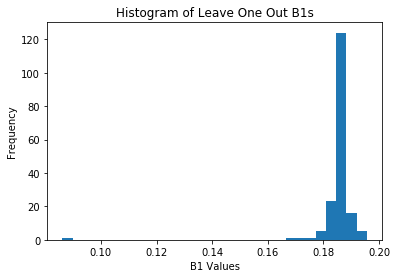

In [19]:
model = ceosal2[['lsalary', 'lsales', 'lmktval' , 'profmarg', 'comten', 'comtensq', 'ceoten', 'ceotensq', 'age', 'college','grad']]

Y = model['lsalary']
X = model.copy().drop(columns = 'lsalary')

ols = sklm.LinearRegression().fit(X,Y)
coefs = pd.DataFrame(data = np.array(ols.coef_).reshape(-1,len(ols.coef_)), columns = X.columns)
coefs.insert(0, 'intercept', ols.intercept_)
print(coefs)

#Estimate LeaveOneOut B1 hats
loo = skms.LeaveOneOut()
B1hats = []
for train, test in loo.split(df):
    ols1 = sklm.LinearRegression().fit(X.loc[train],Y[train])
    B1hats.append(ols1.coef_[0])

#Plot Histogram
plt.hist(B1hats, bins = 30)
plt.title('Histogram of Leave One Out B1s')
plt.xlabel('B1 Values')
plt.ylabel('Frequency')
plt.show()